<a href="https://colab.research.google.com/github/rajivreddy219/ai-projects/blob/main/ImageClassification/CIFARclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install fastai -U

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.CIFAR)

In [4]:
Path.BASE_PATH = path
path.ls()

(#3) [Path('train'),Path('labels.txt'),Path('test')]

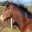

In [5]:
imgs = (path/'train'/'horse').ls()
im = Image.open(imgs[0])
im

In [6]:
# dl = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files,
#                get_y=parent_label)
# dls = dl.dataloaders(path, bs=64)

In [7]:
# dls.show_batch(max_n=9)

In [8]:
dls = ImageDataLoaders.from_folder(train='train', valid='test', path=path, valid_pct=0.2,
                                   item_tfms=Resize(256), 
                                   batch_tfms=aug_transforms(size=224, min_scale=0.75))

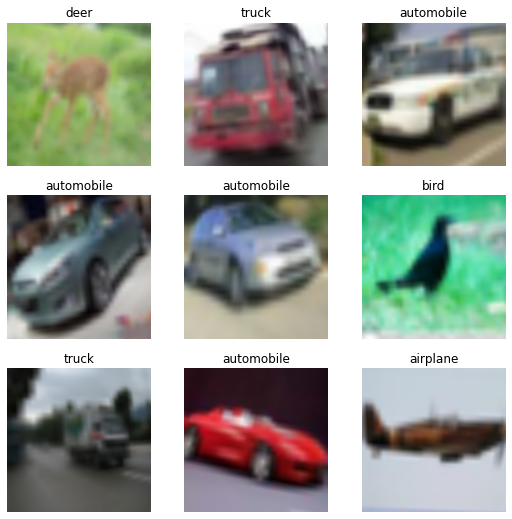

In [9]:
dls.show_batch()

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [11]:
learn.fine_tune(3, freeze_epochs=4)

epoch,train_loss,valid_loss,error_rate,time
0,1.026773,0.528580,0.176667,07:33
1,0.583868,0.321086,0.111917,07:31
2,0.422150,0.228520,0.079750,07:30
3,0.346814,0.186992,0.064083,07:31


epoch,train_loss,valid_loss,error_rate,time
0,0.257378,0.220070,0.072917,10:11
1,0.181197,0.129279,0.044250,10:12
2,0.098840,0.097177,0.033750,10:12


In [17]:
validpath = (path/'test').ls()
validpath

(#10) [Path('test/frog'),Path('test/automobile'),Path('test/airplane'),Path('test/cat'),Path('test/truck'),Path('test/horse'),Path('test/dog'),Path('test/bird'),Path('test/deer'),Path('test/ship')]

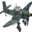

In [18]:
cat = (path/'test'/'airplane').ls()
im = Image.open(cat[20])
im

In [19]:
pred, idx, metric = learn.predict(cat[0])
pred, idx

('airplane', tensor(0))